# ANALIZA PODATKOV SPLETNE STRANI "ARCHIVE OF OUR OWN"

## Archive Of Our Own

Archive Of Our Own, bolje poznana pod imenom "AO3" je neprofitna, nekomercialna spletna stran, ki služi kot arhiv "fanficov". To so (ponavadi) krajše fiktivne zgodbe, ki so jih napisali ljubitelji neke knjige, filma, glasbene skupine... Zgodbe vsebujejo

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)
%matplotlib inline
pot_dela='podatki/dela.csv'
pot_fandomi='podatki/fandomi.csv'
dela=pd.read_csv(pot_dela, index_col="naslov")
fandomi=pd.read_csv(pot_fandomi, index_col="fandom")

In [2]:
fandomi.sort_values("število_del", ascending=False, inplace=True)
fandomi

KeyError: 'število_del'

<Axes: >

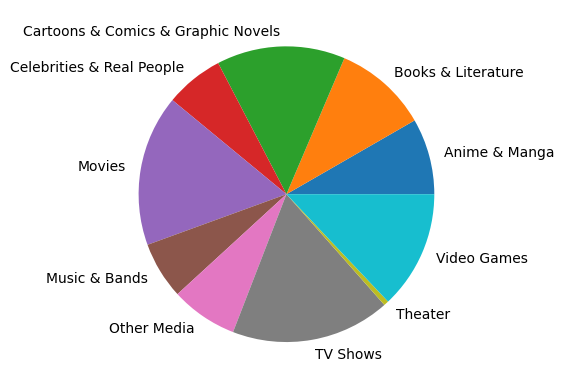

In [ ]:
#funkcija, ki bo za vsako vrsto fandoma preštela števio del
# mogli bi dat po deležih
po_vrstah=fandomi.groupby('vrsta_fandoma').sum()
po_vrstah.plot(kind='pie', y='število_del', ylabel='',legend=False)

<Axes: >

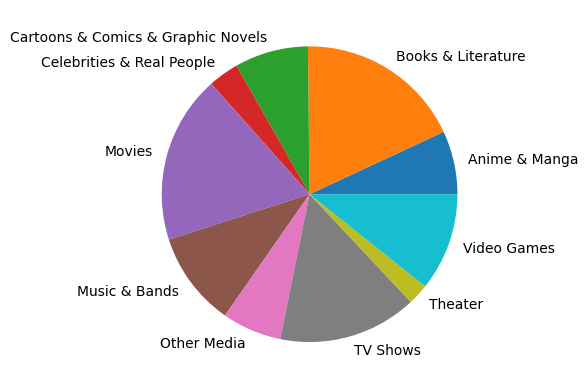

In [ ]:
#število različnih fandomov znotraj vrste
# še delež poračunamo at some point
fandomi.groupby('vrsta_fandoma').size().plot.pie()

In [ ]:
#funkcija, ki zaokroži števila del na tk 100 in pol kok je kerih fandomov
#doda nov stolpec
#pogledamo pol graf i suppose
def zaokroži_100(x):
    return round(x, -2)
dela_zaokroženo=fandomi['število_del'].apply(zaokroži_100)
fandomi['dela zaokroženo']=dela_zaokroženo
fandomi.groupby('dela zaokroženo').size()


dela zaokroženo
0         58069
100        4352
200        1433
300         724
400         446
          ...  
520600        3
536700        3
647100        3
708700        1
763300        1
Length: 352, dtype: int64

In [ ]:
#pogledamo do 100 posebi?
#pogledamo berz tistih ko majo pod 50 pa tk kolko jih je nad tk 1000, če je sploh smiselno gledat

fandomi[fandomi['dela zaokroženo']>1000]

,vrsta_fandoma,število_del,dela zaokroženo
fandom,,,
赤髪の白雪姫 | Akagami no Shirayukihime | Snow White with the Red Hair (Anime &amp; Manga),Anime & Manga,1457,1500
Akatsuki no Yona | Yona of the Dawn,Anime & Manga,2257,2300
Ao no Exorcist | Blue Exorcist,Anime & Manga,3954,4000
Assassination Classroom,Anime & Manga,5978,6000
Banana Fish (Anime &amp; Manga),Anime & Manga,6058,6100
...,...,...,...
Xenoblade Chronicles Series (Video Games),Video Games,6554,6600
Yandere Simulator (Video Game),Video Games,2036,2000
Zenless Zone Zero (Video Game),Video Games,4646,4600


<Axes: xlabel='dela zaokroženo'>

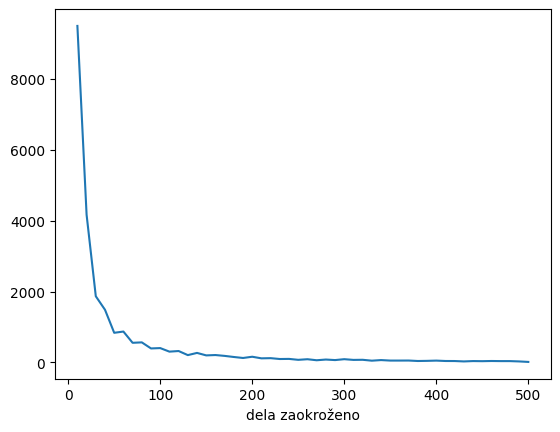

In [ ]:
# tisti, ki majo do 500 myb? jih damo po deset zaokrožit pa napisat en lineplot
# uglavnem bomo še vidli ane
manjši_fandomi=fandomi[fandomi['število_del']<=500].copy()
def zaokroži_10(x):
    return round(x,-1)
dela_zaokroženo_10=manjši_fandomi['število_del'].apply(zaokroži_10)
manjši_fandomi['dela zaokroženo']=dela_zaokroženo_10
manjši_fandomi.sort_values('število_del', inplace=True, ascending=False)
manjši_fandomi[manjši_fandomi['dela zaokroženo']>0].groupby('dela zaokroženo').size().plot()

In [ ]:
dela.groupby('jezik').size()

jezik
Deutsch         1
English      9981
Español         9
Русский         4
中文-普通话 國語       5
dtype: int64

In [ ]:
dela.sort_values('kudos', inplace=True, ascending=False )
dela

,avtor,jezik,število besed,kolekcije,komentarji,kudos,bookmarks,hits,datum,napisana poglavja,vsa poglavja
naslov,,,,,,,,,,,
Who I Was With You,Curly_Kay,English,"62,026",26,822,"9,998","3,427","316,617","(24, None, 2021)",10,10
Sharing is a Myth,XxTheDarkLordxX,English,"5,566",ni podatka,275,"9,992","1,697","80,656","(2, 2, 2018)",1,1
No more lies (To Victory),darkest_ambition,English,"153,470",ni podatka,"1,443","9,980","3,175","312,608","(15, 1, 2025)",20,?
Open For Repairs,FeelsForBreakfast,English,"34,901",9,632,"9,970","2,979","133,128","(7, 1, 2015)",1,1
House Colours,buttons_n_bose,English,"3,631",14,43,"9,965","1,215","70,421","(7, 3, 2021)",1,1
...,...,...,...,...,...,...,...,...,...,...,...
In This World For You,MissusB,English,"79,576",ni podatka,771,"1,967",629,"87,292","(10, 5, 2024)",22,22
that came from my mother's side,idlyfretting,English,"1,372",ni podatka,35,"1,967",376,"9,147","(29, 8, 2023)",1,1
First year back,phoenixgirl26,English,"27,730",ni podatka,29,"1,967",399,"69,799","(28, 3, 2014)",18,18
